<a href="https://colab.research.google.com/github/jaqmol85/M-TODOS-ESTOCASTICOS/blob/main/Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Datos de caudal máximo diario anual
data = {
    'Año': [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
    'Caudal Máximo Diario Anual (m3/s)': [1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835]
}

df = pd.DataFrame(data)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Año'], df['Caudal Máximo Diario Anual (m3/s)'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Valor de Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Valor de Chi-cuadrado: 2599.999999999999
Valor p: 0.24042508943151422


Respuesta 1: como p >0.05 y el valor de chi es grande se puede decir que si hay independencia en los datos

<class 'numpy.ndarray'>
Estimación de la inundación de 1000 años: 3050.00 m3/s
Límites de confianza al 95%: (-74347.98, 3050.00) m3/s


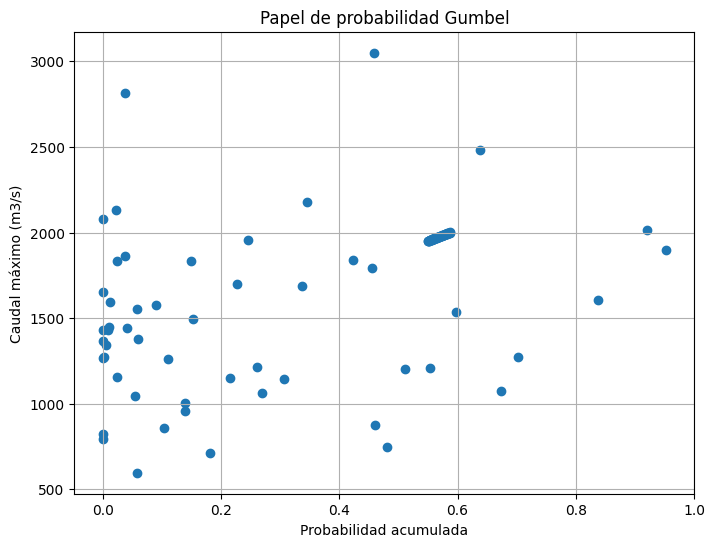

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# Convertir los datos a un arreglo numpy
caudal_maximo = np.array(list(data.values()))
print(type(caudal_maximo))
# Ajustar la distribución Gumbel a los datos
params = genextreme.fit(caudal_maximo)

# Estimar la inundación de 1000 años
inundacion_1000_anios = genextreme.ppf(1 - 1/1000, *params)

# Calcular límites de confianza al 95%
conf_int = genextreme.interval(0.95, *params)

print(f"Estimación de la inundación de 1000 años: {inundacion_1000_anios:.2f} m3/s")
print(f"Límites de confianza al 95%: ({conf_int[0]:.2f}, {conf_int[1]:.2f}) m3/s")

# Calcular la probabilidad acumulada utilizando la distribución Gumbel
def gumbel_cdf(x, mu, beta):
    return np.exp(-np.exp(-(x - mu) / beta))

# Parámetros estimados de la distribución Gumbel
mu_estimado = np.mean(caudal_maximo)  # Media estimada
beta_estimado = np.std(caudal_maximo)  # Parámetro de escala estimado

# Calcular la probabilidad acumulada para los valores de caudal máximo
prob_acumulada = gumbel_cdf(caudal_maximo, mu_estimado, beta_estimado)

# Graficar los datos en papel de probabilidad Gumbel
plt.figure(figsize=(8, 6))
plt.scatter(prob_acumulada, np.sort(caudal_maximo))
plt.xlabel("Probabilidad acumulada")
plt.ylabel("Caudal máximo (m3/s)")
plt.title("Papel de probabilidad Gumbel")
plt.grid()
plt.show()

In [23]:
import numpy as np
import statsmodels.api as sm

# Datos de Qmax y la variable transformada
data = {
    'Año': [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
    'Caudal Máximo Diario Anual (m3/s)': [1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835]
}
caudal_maximo = np.array(list(data.values()))
transformed_var = -np.log(-np.log(np.arange(1, len(caudal_maximo) + 1) / (len(caudal_maximo) + 1)))

# Regresión lineal
X = sm.add_constant(transformed_var)
model = sm.OLS(caudal_maximo, X).fit()
params = model.params

# Estimación de la inundación de 1000 años
caudal_maximo_1000 = params[0] + params[1] * (-np.log(-np.log(1 / 1001)))
# Extraer los valores escalares de los arreglos
mu_estimado = params[0][0]
beta_estimado = params[1][0]

# Imprimir los resultados formateados

caudal_maximo_1000 = mu_estimado + beta_estimado * np.log(1001 / 1000)
print(f"Inundación de 1000 años (caudal_maximo): {caudal_maximo_1000:.2f}")
print(f"Parámetro de ubicación (μ): {mu_estimado:.2f}")
print(f"Parámetro de escala (β): {beta_estimado:.2f}")

Inundación de 1000 años (caudal_maximo): 1884.78
Parámetro de ubicación (μ): 1885.46
Parámetro de escala (β): -686.22


Determine los parámetros de la distribución Gumbel con el método de momentos. Estima la inundación de
1000 años y sus límites de confianza del 95%.

In [21]:
import numpy as np
import scipy.stats as stats

# Datos de caudales máximos diarios anuales
data = np.array([1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835])

# Calcular momentos muestrales
M = np.mean(data)  # Media muestral
V = np.var(data, ddof=1)  # Varianza muestral

# Estimar parámetros de la distribución de Gumbel
mu_estimado = M
beta_estimado = np.sqrt(6 * V) / np.pi
caudal_maximo_1000 = mu_estimado + beta_estimado * np.log(1001 / 1000)
print(f"Inundación de 1000 años (caudal_maximo): {caudal_maximo_1000:.2f}")
print(f"Parámetro de ubicación (μ): {mu_estimado:.2f}")
print(f"Parámetro de escala (β): {beta_estimado:.2f}")

Inundación de 1000 años (caudal_maximo): 1475.40
Parámetro de ubicación (μ): 1475.00
Parámetro de escala (β): 399.26


Estima la inundación de 1000 años asumiendo una distribución lognormal de los valores máximos.

In [18]:
import numpy as np
import scipy.stats as stats

# Calcular momentos muestrales
M = np.mean(data)  # Media muestral
V = np.var(data, ddof=1)  # Varianza muestral

# Estimar parámetros de la distribución lognormal
mu_estimado = M
beta_estimado = np.sqrt(6 * V) / np.pi

print(f"Parámetro de ubicación (μ): {mu_estimado:.2f}")
print(f"Parámetro de escala (β): {beta_estimado:.2f}")

# Estimar la inundación de 1000 años
caudal_maximo_1000 = mu_estimado + beta_estimado * np.log(1001 / 1000)
print(f"Inundación de 1000 años (caudal_maximo): {caudal_maximo_1000:.2f}")

Parámetro de ubicación (μ): 1475.00
Parámetro de escala (β): 399.26
Inundación de 1000 años (caudal_maximo): 1475.40


Prueba si los datos pueden considerarse como resultados de una distribución Gumbel.

In [27]:
import numpy as np
import scipy.stats as stats

# Datos de caudales máximos diarios anuales (reemplaza con tus datos reales)
data = np.array([1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835])

# Estimar parámetros de la distribución Gumbel
mu_estimado = np.mean(data)
beta_estimado = np.sqrt(6 * np.var(data, ddof=1)) / np.pi

# Calcular la CDF de la distribución Gumbel
def gumbel_cdf(x, mu, beta):
    return np.exp(-np.exp(-(x - mu) / beta))

# Calcular la CDF para los datos observados
observed_cdf = gumbel_cdf(data, mu_estimado, beta_estimado)

# Realizar la prueba KS
ks_statistic, p_value = stats.kstest(data, observed_cdf)

alpha = 0.05
if p_value > alpha:
    print("No rechazamos la hipótesis nula. Los datos pueden considerarse como resultados de una distribución Gumbel.")
else:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución Gumbel.")

Rechazamos la hipótesis nula. Los datos no siguen una distribución Gumbel.


Prueba si los datos pueden considerarse como resultados de una distribución lognormal.

In [31]:
import numpy as np
import scipy.stats as stats

import numpy as np
import scipy.stats as stats

# Datos de caudales máximos diarios anuales (reemplaza con tus datos reales)
data = np.array([1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835])

# Calcular momentos muestrales
M = np.mean(data)  # Media muestral
V = np.var(data, ddof=1)  # Varianza muestral

# Estimar parámetros de la distribución lognormal
mu_estimado = M
beta_estimado = np.sqrt(6 * V) / np.pi

print(f"Parámetro de ubicación (μ): {mu_estimado:.2f}")
print(f"Parámetro de escala (β): {beta_estimado:.2f}")


# Calcular la CDF de la distribución lognormal
def lognormal_cdf(x, mu, beta):
    return stats.lognorm.cdf(x, s=beta, scale=np.exp(mu))

# Calcular la CDF para los datos observados
observed_cdf = lognormal_cdf(data, mu_estimado, beta_estimado)

# Realizar la prueba KS
ks_statistic, p_value = stats.kstest(data, observed_cdf)

alpha = 0.05
if p_value > alpha:
    print("No rechazamos la hipótesis nula. Los datos pueden considerarse como resultados de una distribución lognormal.")
else:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución lognormal.")

Parámetro de ubicación (μ): 1475.00
Parámetro de escala (β): 399.26
Rechazamos la hipótesis nula. Los datos no siguen una distribución lognormal.


<ipython-input-31-d8de0da014a5>:24: RuntimeWarning: overflow encountered in exp
  return stats.lognorm.cdf(x, s=beta, scale=np.exp(mu))


In [33]:
import numpy as np
from scipy.stats import genextreme

# Datos de caudal máximo diario anual
data = {
    'Año': [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001],
    'Caudal Máximo Diario Anual (m3/s)': [1266, 1492, 1862, 861, 715, 1367, 1837, 1429, 1429, 1261, 1607, 2132, 1652, 1537, 1155, 1899, 1956, 1596, 1380, 745, 2181, 955, 1007, 824, 1271, 1044, 597, 1216, 1061, 1450, 2016, 1270, 1341, 1075, 2482, 874, 1689, 1554, 1831, 1149, 1444, 1791, 1207, 3050, 1578, 2817, 792, 1143, 1698, 2076, 1204, 1835]
}

# Ajustamos la distribución de Gumbel a los datos
params = genextreme.fit(data['Caudal Máximo Diario Anual (m3/s)'])

# Calculamos la probabilidad de que el caudal supere un valor específico (40 m3/s en este caso)
valor_especifico = 1475.40
probabilidad = 1 - genextreme.cdf(valor_especifico, *params)

# Convertimos la probabilidad a porcentaje
probabilidad_porcentaje = probabilidad * 100

print(f"La probabilidad de que el caudal supere {valor_especifico} m3/s en los próximos 40 años es aproximadamente del {probabilidad_porcentaje:.2f}%.")

La probabilidad de que el caudal supere 1475.4 m3/s en los próximos 40 años es aproximadamente del 25.64%.


¿Cuál es la probabilidad de que la inundación de 1000 años ocurra dos veces en los próximos 100 años?

In [34]:
# Probabilidad de ninguna vez o una vez en 100 años
prob_ninguna_o_una_vez = (1 - probabilidad) ** 100 + 100 * probabilidad * (1 - probabilidad) ** 99

# Probabilidad de al menos dos veces en 100 años
prob_al_menos_dos_veces = 1 - prob_ninguna_o_una_vez

print(f"La probabilidad de que la inundación de 1000 años ocurra al menos dos veces en los próximos 100 años es aproximadamente del {prob_al_menos_dos_veces:.2f}%.")

La probabilidad de que la inundación de 1000 años ocurra al menos dos veces en los próximos 100 años es aproximadamente del 1.00%.
